In [5]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.lite as tflite

In [3]:
model = keras.models.load_model('bees-wasps.h5')

In [4]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('bees-wasps.tflite', 'wb') as f_out:
    f_out.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Maria\AppData\Local\Temp\tmpg9h9eoue\assets


INFO:tensorflow:Assets written to: C:\Users\Maria\AppData\Local\Temp\tmpg9h9eoue\assets


In [16]:
from keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input
import numpy as np

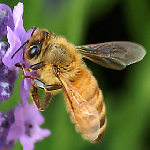

In [15]:
img = load_img('21571844_e971a46579_n.jpg', target_size=(150, 150))
img

In [17]:
x = np.array(img)
x = np.array([x])
X = preprocess_input(x)

In [6]:
interpreter = tflite.Interpreter(model_path='bees-wasps.tflite')
interpreter.allocate_tensors()

In [9]:
input_index = interpreter.get_input_details()[0]['index']

In [12]:
output_index = interpreter.get_output_details()[0]['index']
output_index

13

In [18]:
interpreter.set_tensor(input_index, X)

In [19]:
interpreter.invoke()

In [20]:
interpreter.get_tensor(output_index)

array([[0.00234382]], dtype=float32)

In [21]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

In [32]:
img = download_image('https://habrastorage.org/webt/rt/d9/dh/rtd9dhsmhwrdezeldzoqgijdg8a.jpeg')
img_prep = prepare_image(img, (150, 150))

In [42]:
def preprocess_image(img):
    X = np.array(img_prep, dtype='float32')
    X = np.array([X])
    X = X /255.0
    return X

In [39]:
X = np.array(img_prep, dtype='float32')
X = np.array([X])
X = X /255.0
X.shape

(1, 150, 150, 3)

In [40]:
X[0, 0, 0, 0]

0.94509804

In [43]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
interpreter.get_tensor(output_index)

array([[0.65898407]], dtype=float32)